### Ensemble Classfiers

In [30]:
import os
import glob
import numpy as np
import random
import shutil
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, get_scorer_names, precision_score,recall_score,f1_score, accuracy_score
import seaborn as sns
from random import randint
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

#### Filtering the dataset

In [45]:
# Extracting common images (Not part of genetic algorithm)
LATEST_ORIG_DATA_PATH = os.path.join(os.getcwd(), "../../Combined New", "test")
LATEST_FACE_DATA_PATH = os.path.join(os.getcwd(), "../../Combined new faces", "test")
LATEST_HAND_DATA_PATH = os.path.join(os.getcwd(), "../../Combined new hand", "test")

ENSEMBLE_ORIG_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/orig/test")
ENSEMBLE_FACE_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/face/test")
ENSEMBLE_HAND_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/hand/test")

class_labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']

for class_label in class_labels:
    if not os.path.exists(os.path.join(ENSEMBLE_ORIG_DATA_PATH, class_label)):
       os.makedirs(os.path.join(ENSEMBLE_ORIG_DATA_PATH, class_label))
    if not os.path.exists(os.path.join(ENSEMBLE_FACE_DATA_PATH, class_label)):
        os.makedirs(os.path.join(ENSEMBLE_FACE_DATA_PATH, class_label))
    if not os.path.exists(os.path.join(ENSEMBLE_HAND_DATA_PATH, class_label)):
        os.makedirs(os.path.join(ENSEMBLE_HAND_DATA_PATH, class_label))

    latest_orig_dir_path = LATEST_ORIG_DATA_PATH + '/' + class_label
    latest_face_dir_path = LATEST_FACE_DATA_PATH + '/' + class_label
    latest_hand_dir_path = LATEST_HAND_DATA_PATH + '/' + class_label
    
    ensemble_orig_dir_path = ENSEMBLE_ORIG_DATA_PATH + '/' + class_label
    ensemble_face_dir_path = ENSEMBLE_FACE_DATA_PATH + '/' + class_label
    ensemble_hand_dir_path = ENSEMBLE_HAND_DATA_PATH + '/' + class_label

    for filename in os.listdir(latest_face_dir_path):
        if (os.path.exists(latest_orig_dir_path + '/' + filename) and 
            os.path.exists(latest_hand_dir_path + '/' + filename)):
            shutil.copy(latest_orig_dir_path + '/' + filename, ensemble_orig_dir_path + '/' + filename)
            shutil.copy(latest_face_dir_path + '/' + filename, ensemble_face_dir_path + '/' + filename)
            shutil.copy(latest_hand_dir_path + '/' + filename, ensemble_hand_dir_path + '/' + filename)

print('Done filtering common images')

Done filtering common images


In [ ]:
# Extracting common images (Not part of genetic algorithm)
LATEST_ORIG_DATA_PATH = os.path.join(os.getcwd(), "../../Combined New", "unseen")
LATEST_FACE_DATA_PATH = os.path.join(os.getcwd(), "../../Combined new faces", "unseen")
LATEST_HAND_DATA_PATH = os.path.join(os.getcwd(), "../../Combined new hand", "unseen")

ENSEMBLE_ORIG_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/orig/unseen")
ENSEMBLE_FACE_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/face/unseen")
ENSEMBLE_HAND_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/hand/unseen")

class_labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']

for class_label in class_labels:
    if not os.path.exists(os.path.join(ENSEMBLE_ORIG_DATA_PATH, class_label)):
       os.makedirs(os.path.join(ENSEMBLE_ORIG_DATA_PATH, class_label))
    if not os.path.exists(os.path.join(ENSEMBLE_FACE_DATA_PATH, class_label)):
        os.makedirs(os.path.join(ENSEMBLE_FACE_DATA_PATH, class_label))
    if not os.path.exists(os.path.join(ENSEMBLE_HAND_DATA_PATH, class_label)):
        os.makedirs(os.path.join(ENSEMBLE_HAND_DATA_PATH, class_label))

    latest_orig_dir_path = LATEST_ORIG_DATA_PATH + '/' + class_label
    latest_face_dir_path = LATEST_FACE_DATA_PATH + '/' + class_label
    latest_hand_dir_path = LATEST_HAND_DATA_PATH + '/' + class_label
    
    ensemble_orig_dir_path = ENSEMBLE_ORIG_DATA_PATH + '/' + class_label
    ensemble_face_dir_path = ENSEMBLE_FACE_DATA_PATH + '/' + class_label
    ensemble_hand_dir_path = ENSEMBLE_HAND_DATA_PATH + '/' + class_label

    for filename in os.listdir(latest_face_dir_path):
        if (os.path.exists(latest_orig_dir_path + '/' + filename) and 
            os.path.exists(latest_hand_dir_path + '/' + filename)):
            shutil.copy(latest_orig_dir_path + '/' + filename, ensemble_orig_dir_path + '/' + filename)
            shutil.copy(latest_face_dir_path + '/' + filename, ensemble_face_dir_path + '/' + filename)
            shutil.copy(latest_hand_dir_path + '/' + filename, ensemble_hand_dir_path + '/' + filename)

print('Done filtering common images')

Done filtering common images


In [ ]:
# Extracting common images (Not part of genetic algorithm)
LATEST_ORIG_DATA_PATH = os.path.join(os.getcwd(), "../../Combined New", "new_train")
LATEST_FACE_DATA_PATH = os.path.join(os.getcwd(), "../../Combined new faces", "new_train")
LATEST_HAND_DATA_PATH = os.path.join(os.getcwd(), "../../Combined new hand", "new_train")

ENSEMBLE_ORIG_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/orig/train")
ENSEMBLE_FACE_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/face/train")
ENSEMBLE_HAND_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/hand/train")

class_labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']

for class_label in class_labels:
    if not os.path.exists(os.path.join(ENSEMBLE_ORIG_DATA_PATH, class_label)):
       os.makedirs(os.path.join(ENSEMBLE_ORIG_DATA_PATH, class_label))
    if not os.path.exists(os.path.join(ENSEMBLE_FACE_DATA_PATH, class_label)):
        os.makedirs(os.path.join(ENSEMBLE_FACE_DATA_PATH, class_label))
    if not os.path.exists(os.path.join(ENSEMBLE_HAND_DATA_PATH, class_label)):
        os.makedirs(os.path.join(ENSEMBLE_HAND_DATA_PATH, class_label))

    latest_orig_dir_path = LATEST_ORIG_DATA_PATH + '/' + class_label
    latest_face_dir_path = LATEST_FACE_DATA_PATH + '/' + class_label
    latest_hand_dir_path = LATEST_HAND_DATA_PATH + '/' + class_label
    
    ensemble_orig_dir_path = ENSEMBLE_ORIG_DATA_PATH + '/' + class_label
    ensemble_face_dir_path = ENSEMBLE_FACE_DATA_PATH + '/' + class_label
    ensemble_hand_dir_path = ENSEMBLE_HAND_DATA_PATH + '/' + class_label

    for filename in os.listdir(latest_face_dir_path):
        if (os.path.exists(latest_orig_dir_path + '/' + filename) and 
            os.path.exists(latest_hand_dir_path + '/' + filename)):
            shutil.copy(latest_orig_dir_path + '/' + filename, ensemble_orig_dir_path + '/' + filename)
            shutil.copy(latest_face_dir_path + '/' + filename, ensemble_face_dir_path + '/' + filename)
            shutil.copy(latest_hand_dir_path + '/' + filename, ensemble_hand_dir_path + '/' + filename)

print('Done filtering common images')

Done filtering common images


#### Loading the required models

#### Setting up the input and output datasets

In [9]:
ORI_MODEL_PATH = '../models/distracted-inception_dropout_best.hdf5'
HAND_MODEL_PATH = '../models/best_model_hand_molyswu.h5'
FACE_MODEL_PATH = '../models/best_model_face_inception.h5'

In [10]:
orig_model = tf.keras.models.load_model(ORI_MODEL_PATH)
hand_model = tf.keras.models.load_model(HAND_MODEL_PATH)
face_model = tf.keras.models.load_model(FACE_MODEL_PATH)

In [75]:
# Importing data
orig_datagen = ImageDataGenerator(
        preprocessing_function = preprocess_input
)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# TODO: Need to make sure that the same image is used for both models
ORIG_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/orig/train")
FACE_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/face/train")
HANDS_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/hand/train")

# Computing predictions using the best orig model
orig_generator = orig_datagen.flow_from_directory(ORIG_DATA_PATH,
                                                    batch_size  = 40,
                                                    class_mode  = 'categorical', 
                                                    target_size = (100, 75), shuffle = False)
y_orig_preds = orig_model.predict(orig_generator) # Orig data predictions

# Computing predictions using the best face model
face_test_generator = test_datagen.flow_from_directory(FACE_DATA_PATH,
                                                    batch_size  = 40,
                                                    class_mode  = 'categorical', 
                                                    target_size = (100, 75), shuffle = False)
face_data_inputs = face_test_generator # Face data input
y_face_preds = face_model.predict(face_test_generator) # Face data predictions

# Computing predictions using the best hand model
hand_test_generator = test_datagen.flow_from_directory(HANDS_DATA_PATH,
                                                    batch_size  = 40,
                                                    class_mode  = 'categorical', 
                                                    target_size = (100, 75), shuffle = False)

hands_data_inputs = hand_test_generator # Hand data input
y_hands_preds = hand_model.predict(hand_test_generator) # Hand data predictions

# Expected data outputs
num_of_classes = 8
expected_output_labels = face_test_generator.classes # Expected output labels, assuming that both models are working with the same images
data_outputs = np.zeros((expected_output_labels.size, num_of_classes))
data_outputs[np.arange(expected_output_labels.size), expected_output_labels] = 1

Found 5157 images belonging to 8 classes.
129/129 [==============================] - 113s 856ms/step
Found 5157 images belonging to 8 classes.
129/129 [==============================] - 17s 121ms/step
Found 5157 images belonging to 8 classes.
129/129 [==============================] - 95s 730ms/step


#### Helper Functions

In [5]:
'''
Given an array contain the predictions from each classifier and the weights to be assigned to each classifier, this function computes the final weighted probability.
'''
def weighted_probability(num_of_classfiers, num_of_classes, networks_outputs, curr_weight_combi):
    result = [0 for i in range(0, num_of_classes)]
    sum = 0

    for i in range(0, num_of_classfiers):
        curr_network_output = networks_outputs[i]
        curr_weight = curr_weight_combi[i]

        for j in range(0, num_of_classes):
            result[j] += curr_network_output[j] * curr_weight
            sum += result[j]
    
    for k in range(0, num_of_classes): # Normalising to ensure that the final output is still in terms of probability
        result[k] = result[k] / sum

    return result

'''
Calculates the negative log loss.
'''
def fitness(y_pred, y_true): # Negative log loss function
    return metrics.log_loss(y_true, y_pred)

'''
Randomly changes a given float number (up to 2%). 
Note: The method of mutation was not stated in the research paper. 
'''
def mutate(weight_combi): #TODO: Need to double-check if this is okay
    for i in range(0, len(weight_combi)):
        weight_combi[i] = weight_combi[i] * random.uniform(0.99, 1.01)
    
    return weight_combi

'''
Given 2 different possible weight combination, this function produces a final weight combination by randomly extracting weight elements from either parent combinations.
'''
def cross_over(num_of_classifiers, parent_1, parent_2): #TODO: Need to double-check if this is okay
    cut = random.randint(0, num_of_classifiers - 1)
    new_weight_combi = parent_1[:cut] 
    new_weight_combi.extend(parent_2[cut:])

    return new_weight_combi

'''
Produces combinations of weights that can be assigned to each of the classifiers. 
'''
def generate_possible_weight_combis(num_of_classifiers, num_of_combis, weight_limit):
    possible_weight_combis = []

    while (num_of_combis > 0):
        curr_weight_combi = []
        curr_combi_len = 0

        while (curr_combi_len < num_of_classifiers):
            curr_weight = random.uniform(0, weight_limit)
            curr_weight_combi.append(curr_weight)

            curr_combi_len += 1
        
        possible_weight_combis.append(curr_weight_combi)
        num_of_combis -= 1
    
    return possible_weight_combis


#### Start of Genetic Algorithm to find the optimal weights for each classifier

In [77]:
# Defining essential variables
num_of_classifiers = 3
num_of_classes = 8
num_of_required_weight_combis = 20
weight_limit = 100
possible_weight_combis = generate_possible_weight_combis(num_of_classifiers, num_of_required_weight_combis, weight_limit)
max_num_of_iters = 15

# print(possible_weight_combis)

while (max_num_of_iters > 0):
    # Step 1: Randomly chossing 50% of the dataset to calculate the fitness scores for
    chosen_y_true = []
    chosen_y_orig_pred = []
    chosen_y_face_pred = []
    chosen_y_hand_pred = []

    required_num_of_samples = len(data_outputs) // 2 # Rounding down

    random_indices = []
    while required_num_of_samples > 0:
        curr_index = randint(0, len(data_outputs) - 1)

        if (curr_index not in random_indices):
            chosen_y_true.append(data_outputs[curr_index])
            chosen_y_orig_pred.append(y_orig_preds[curr_index])
            chosen_y_face_pred.append(y_face_preds[curr_index])
            chosen_y_hand_pred.append(y_hands_preds[curr_index])

            random_indices.append(curr_index)
            required_num_of_samples -= 1

    # Step 2: Calculate the average fitness scores for each of the possible weight combinations
    fitness_and_weights = []

    for weights in possible_weight_combis:
        accumulated_fitness_score = 0
        num_of_samples = 0

        for i in range(0, len(chosen_y_true)):
            network_outputs = [chosen_y_orig_pred[i], chosen_y_face_pred[i], chosen_y_hand_pred[i]]
            y_pred = weighted_probability(num_of_classifiers, num_of_classes, network_outputs, weights)
            y_true = chosen_y_true[i]
            fitness_score = fitness(y_pred, y_true)
            accumulated_fitness_score += fitness_score

            num_of_samples += 1
        
        avg_fitness_score = accumulated_fitness_score / num_of_samples
        fitness_and_weights.append((avg_fitness_score, weights))
    
    # print(fitness_and_weights) # For testing

    # Step 3: Rank the weight combis from best to worse
    fitness_and_weights.sort() # The combis with the lowest log loss is at the start
    # print(fitness_and_weights) # For testing

    # Step 4: Selecting parents
    parents = []
    curr_index = 0

    # Selecting top 20% of the weight combis
    top_20_percent = int(len(fitness_and_weights) // 5) # Rounding down
    while (top_20_percent > 0):
        parents.append(fitness_and_weights[curr_index][1])
        top_20_percent -= 1
        curr_index += 1

    # Randomly choosing another 10% of the weight combinations
    another_10_percent = int(len(fitness_and_weights) // 10)  # Rounding down
    while(another_10_percent > 0):
        random_score_and_parent = random.choice(fitness_and_weights[curr_index:])
        parents.append(random_score_and_parent[1])
        fitness_and_weights.remove(random_score_and_parent)

        another_10_percent -= 1
    
    # print(parents) # For testing

    # Step 5: Randomly mutate 5% of the selected parents
    num_of_parents_to_mutate = max(1, int(len(parents) // 10))  # Rounding down
    index_of_parents_to_mutate = [random.randint(0, len(parents) - 1) for i in range(0, num_of_parents_to_mutate)]

    for index in index_of_parents_to_mutate:
        parents[index] = mutate(parents[index])
    
    # print(parents) # For testing

    # Step 6: Randomly cross over parents to produce new set of weight combinations
    new_weight_combis = []
    index_of_crossed_parents = []
    num_of_curr_weights = 0

    while (num_of_curr_weights < num_of_required_weight_combis):
        chosen_parents = (random.randint(0, len(parents) - 1), random.randint(0, len(parents) - 1))
        parent_1 = parents[chosen_parents[0]]
        parent_2 = parents[chosen_parents[1]]

        if (parent_1 != parent_2 and chosen_parents not in index_of_crossed_parents):
            new_weight_combi = cross_over(num_of_classifiers, parent_1, parent_2)
            new_weight_combis.append(new_weight_combi)
            num_of_curr_weights += 1

    possible_weight_combis = new_weight_combis
    print(possible_weight_combis) # For testing

    max_num_of_iters -= 1

# Step 7: Select the best weights combination
final_fitness_and_weights = []

for weights in possible_weight_combis:
    accumulated_fitness_score = 0
    num_of_samples = 0

    for i in range(0, len(chosen_y_true)):
            network_outputs = [chosen_y_orig_pred[i], chosen_y_face_pred[i], chosen_y_hand_pred[i]]
            y_pred = weighted_probability(num_of_classifiers, num_of_classes, network_outputs, weights)
            y_true = chosen_y_true[i]
            fitness_score = fitness(y_pred, y_true)
            accumulated_fitness_score += fitness_score

            num_of_samples += 1
    
    avg_fitness_score = accumulated_fitness_score / num_of_samples
    final_fitness_and_weights.append((avg_fitness_score, weights))

final_fitness_and_weights.sort() # The combis with the lowest log loss is at the start
best_weights = final_fitness_and_weights[0][1]
print("The best weight combination is: " + str(best_weights))
print("The fitness score of this combination is: " + str(final_fitness_and_weights[0][0]))

[[10.552235993280402, 25.618457039198482, 60.18967251597343], [1.3292377697079139, 19.300057236381672, 9.96295552336024], [10.552235993280402, 25.618457039198482, 77.20339507245673], [11.727139589191049, 52.33266797321393, 44.75062153906333], [23.265488833758553, 52.33266797321393, 44.75062153906333], [0.8423873672450455, 13.453624407598985, 77.87002418856913], [11.727139589191049, 79.31036675273418, 77.87002418856913], [88.67829478507714, 23.575405395510963, 77.20339507245673], [11.727139589191049, 79.31036675273418, 9.96295552336024], [11.727139589191049, 23.575405395510963, 77.20339507245673], [23.265488833758553, 52.33266797321393, 77.20339507245673], [0.8423873672450455, 13.453624407598985, 70.279074437823], [88.67829478507714, 19.300057236381672, 9.96295552336024], [88.67829478507714, 19.300057236381672, 9.96295552336024], [1.3292377697079139, 19.300057236381672, 9.96295552336024], [10.552235993280402, 79.31036675273418, 70.279074437823], [1.3292377697079139, 79.31036675273418, 7

Best weights optained from running the above multiple times: [2.9664082490355335, 58.99055534546495, 60.24531487370649]

#### Computing the performance of the ensemble model

In [6]:
best_weights = [2.9664082490355335, 58.99055534546495, 60.24531487370649]

In [11]:
orig_datagen = ImageDataGenerator(
        preprocessing_function = preprocess_input
)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Measuring performance on test data first
ORIG_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/orig/test")
FACE_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/face/test")
HANDS_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/hand/test")

# Computing predictions using the best orig model
orig_generator = orig_datagen.flow_from_directory(ORIG_DATA_PATH,
                                                    batch_size  = 40,
                                                    class_mode  = 'categorical', 
                                                    target_size = (100, 75), shuffle = False)
y_orig_preds_test = orig_model.predict(orig_generator) # Orig data predictions

# Computing predictions by the best face model
face_test_generator = test_datagen.flow_from_directory(FACE_DATA_PATH,
                                                    batch_size  = 40,
                                                    class_mode  = 'categorical', 
                                                    target_size = (100, 75), shuffle = False)
face_data_inputs = face_test_generator # Face data input
y_face_preds_test = face_model.predict(face_test_generator) # Face data predictions

# Computing predictions by the best hand model
hand_test_generator = test_datagen.flow_from_directory(HANDS_DATA_PATH,
                                                    batch_size  = 40,
                                                    class_mode  = 'categorical', 
                                                    target_size = (100, 75), shuffle = False)

hands_data_inputs = hand_test_generator # Hand data input
y_hands_preds_test = hand_model.predict(hand_test_generator) # Hand data predictions

# Expected data outputs
num_of_classes = 8
expected_output_labels_test = face_test_generator.classes # Expected output labels, assuming that both models are working with the same images

Found 2614 images belonging to 8 classes.
66/66 [==============================] - 55s 795ms/step
Found 2614 images belonging to 8 classes.
66/66 [==============================] - 10s 144ms/step
Found 2614 images belonging to 8 classes.
66/66 [==============================] - 47s 701ms/step


In [18]:
weighted_preds = []
num_of_classifiers = 3
num_of_classes = 8

for i in range(0, len(expected_output_labels_test)):
    networks_outputs = [y_orig_preds_test[i], y_face_preds_test[i], y_hands_preds_test[i]]
    weighted_preds.append(weighted_probability(num_of_classifiers, num_of_classes, networks_outputs, best_weights))

ensemble_ypred = np.argmax(weighted_preds, axis=1)

# Printing out metrics
accuracy = accuracy_score(expected_output_labels_test, ensemble_ypred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(expected_output_labels_test, ensemble_ypred, average='weighted')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(expected_output_labels_test, ensemble_ypred, average='weighted')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(expected_output_labels_test, ensemble_ypred, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.928080
Precision: 0.928859
Recall: 0.928080
F1 score: 0.927638


In [19]:
LABELS = [0, 1, 2, 3, 4, 5, 6, 7]
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

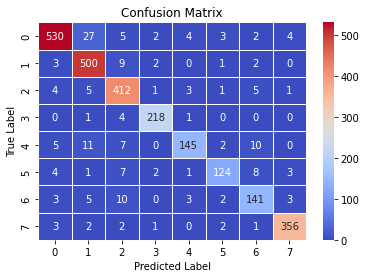


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       577
           1       0.91      0.97      0.94       517
           2       0.90      0.95      0.93       432
           3       0.96      0.97      0.97       224
           4       0.92      0.81      0.86       180
           5       0.92      0.83      0.87       150
           6       0.83      0.84      0.84       167
           7       0.97      0.97      0.97       367

    accuracy                           0.93      2614
   macro avg       0.92      0.91      0.91      2614
weighted avg       0.93      0.93      0.93      2614



In [20]:
show_confusion_matrix(expected_output_labels_test, ensemble_ypred)

print("\n--- Classification report for test data ---\n")

print(classification_report(expected_output_labels_test, ensemble_ypred))

In [25]:
# Measuring performance on unseen data
ORIG_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/orig/unseen")
FACE_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/face/unseen")
HANDS_DATA_PATH = os.path.join(os.getcwd(), "../../latest_combined_common_images/hand/unseen")

# Computing predictions using the best orig model
orig_generator = orig_datagen.flow_from_directory(ORIG_DATA_PATH,
                                                    batch_size  = 40,
                                                    class_mode  = 'categorical', 
                                                    target_size = (100, 75), shuffle = False)
y_orig_preds_unseen = orig_model.predict(orig_generator) # Orig data predictions

# Computing predictions by the best face model
face_test_generator = test_datagen.flow_from_directory(FACE_DATA_PATH,
                                                    batch_size  = 40,
                                                    class_mode  = 'categorical', 
                                                    target_size = (100, 75), shuffle = False)
face_data_inputs = face_test_generator # Face data input
y_face_preds_unseen = face_model.predict(face_test_generator) # Face data predictions

# Computing predictions by the best hand model
hand_test_generator = test_datagen.flow_from_directory(HANDS_DATA_PATH,
                                                    batch_size  = 40,
                                                    class_mode  = 'categorical', 
                                                    target_size = (100, 75), shuffle = False)

hands_data_inputs = hand_test_generator # Hand data input
y_hands_preds_unseen = hand_model.predict(hand_test_generator) # Hand data predictions

# Expected data outputs
num_of_classes = 8
expected_output_labels_unseen = face_test_generator.classes # Expected output labels, assuming that both models are working with the same images

Found 448 images belonging to 8 classes.
12/12 [==============================] - 8s 694ms/step
Found 448 images belonging to 8 classes.
12/12 [==============================] - 2s 128ms/step
Found 448 images belonging to 8 classes.
12/12 [==============================] - 7s 568ms/step


In [26]:
weighted_preds = []

for i in range(0, len(expected_output_labels_unseen)):
    networks_outputs = [y_orig_preds_unseen[i], y_face_preds_unseen[i], y_hands_preds_unseen[i]]
    weighted_preds.append(weighted_probability(num_of_classifiers, num_of_classes, networks_outputs, best_weights))

ensemble_ypred = np.argmax(weighted_preds, axis=1)

# Printing out metrics
accuracy = accuracy_score(expected_output_labels_unseen, ensemble_ypred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(expected_output_labels_unseen, ensemble_ypred, average='weighted')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(expected_output_labels_unseen, ensemble_ypred, average='weighted')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(expected_output_labels_unseen, ensemble_ypred, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.607143
Precision: 0.599224
Recall: 0.607143
F1 score: 0.589535


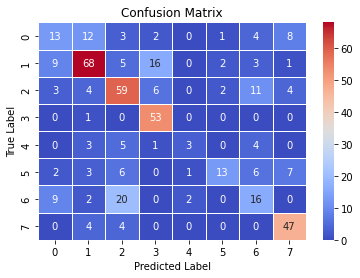


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       0.36      0.30      0.33        43
           1       0.70      0.65      0.68       104
           2       0.58      0.66      0.62        89
           3       0.68      0.98      0.80        54
           4       0.50      0.19      0.27        16
           5       0.72      0.34      0.46        38
           6       0.36      0.33      0.34        49
           7       0.70      0.85      0.77        55

    accuracy                           0.61       448
   macro avg       0.58      0.54      0.53       448
weighted avg       0.60      0.61      0.59       448



In [27]:
show_confusion_matrix(expected_output_labels_unseen, ensemble_ypred)

print("\n--- Classification report for test data ---\n")

print(classification_report(expected_output_labels_unseen, ensemble_ypred))

c0
1/1 [==============================] - 0s 52ms/step
c1
1/1 [==============================] - 0s 121ms/step
c2
1/1 [==============================] - 0s 48ms/step
c3
1/1 [==============================] - 0s 75ms/step
c4
1/1 [==============================] - 0s 31ms/step
c5
1/1 [==============================] - 0s 44ms/step
c6
1/1 [==============================] - 0s 33ms/step
c7
1/1 [==============================] - 0s 72ms/step


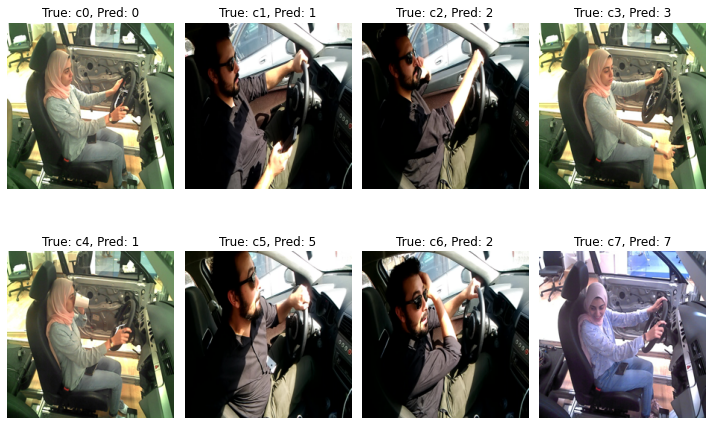

In [39]:
imgs = []
y_preds = []
y_trues = []
img_number = [40, 32, 28, 40, 10, 15, 12, 34]
i = 0

for cls in os.listdir(ORIG_DATA_PATH):
    if cls != '.DS_Store':
        print(cls)
        cls_path = os.path.join(ORIG_DATA_PATH, cls)
        img_name = os.listdir(cls_path)[img_number[i]]
        img_path = os.path.join(cls_path, img_name)
        #original
        img = Image.open(img_path).convert("RGB")
        img_resize = img.resize((224, 224))
        imgs.append(img_resize)
        img_array = np.asarray(img_resize)
        img_array = np.expand_dims(img_array, axis=0)
        input_data = img_array/255.0
        y_pred_orig = orig_model.predict(input_data)
        #face
        img_face = Image.open(os.path.join(FACE_DATA_PATH, cls, img_name)).convert("RGB")
        img_resize = img_face.resize((75, 100))
        img_array = np.asarray(img_resize)
        img_array = np.expand_dims(img_array, axis=0)
        input_data = img_array/255.0
        y_pred_face = face_model.predict(input_data)
        #hand
        img_face = Image.open(os.path.join(HANDS_DATA_PATH, cls, img_name)).convert("RGB")
        img_resize = img_face.resize((75, 100))
        img_array = np.asarray(img_resize)
        img_array = np.expand_dims(img_array, axis=0)
        input_data = img_array/255.0
        y_pred_hand = hand_model.predict(input_data)
        #final pred
        networks_outputs = np.asarray([y_pred_orig[0], y_pred_face[0], y_pred_hand[0]])
        weighted_pred = weighted_probability(num_of_classifiers, num_of_classes, networks_outputs, best_weights)
        y_preds.append(np.argmax(weighted_pred))
        y_trues.append(cls)
        i += 1

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    # Plot the image
    img = imgs[i]
    ax.imshow(img)
    ax.axis('off')
    
    # Get the true and predicted labels
    true_label = y_trues[i]
    pred_label = y_preds[i]
    
    # Set the title of the plot with the true and predicted labels
    ax.set_title(f'True: {true_label}, Pred: {pred_label}')
    
    # Break out of the loop after 12 images have been plotted
    if i == 7:
        break

plt.tight_layout()
plt.show()